In [1]:
from importlib import reload
from src.GEFConstructor import CreateGEF

import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Comparison Run
ntr = 240
tfin = 250#45
tmid = 100
GEFComp = CreateGEF("Config/SchwingerGEF+beta25+Mass+OldMix.py")
GEFComp.Unitless()

print("GEFComp loaded")

GEF1 = CreateGEF("Config/SchwingerGEF-Test.py")
GEF1.RunGEF(ntr, tend=tmid, reachNend=True, printstats=True, atol=1e-3)

GEFComp loaded
No existing GEF data found. You can specify a file to load using GEF.LoadData or solve the GEF equations using GEF.RunGEF.
The end of inflation was not reached by the solver. Increasing tend by 10.0 to 110.0.
The end of inflation was not reached by the solver. Increasing tend by 4.0 to 114.0.
The end of inflation was not reached by the solver. Increasing tend by 1.0 to 115.0.
Elapsed time: 190.9778 seconds
The run terminated with the following statistics:
nfev : [51194, 44684, 18404, 2264]
njev : 0
nlu : 0
status : 1
message : A termination event occurred.
success : True
attempts : 4
The following events occured during the run:
End of inflation at t=[114.9] or N=[61.01]


61.00797971832796
61.0090440348783


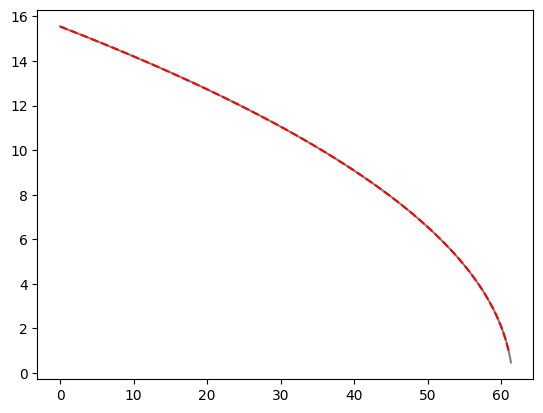

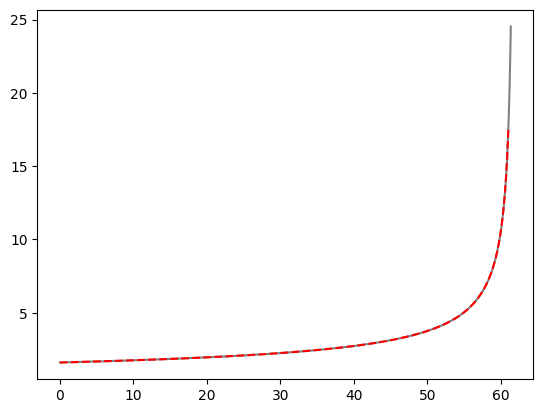

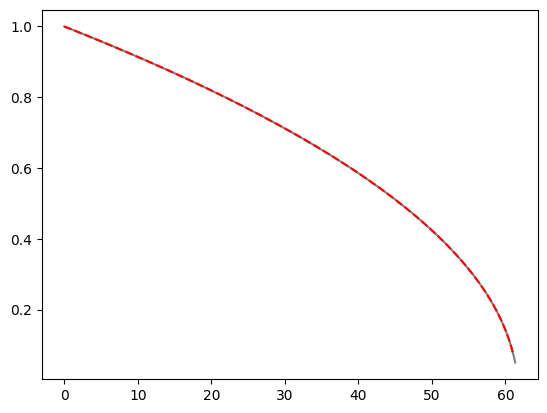

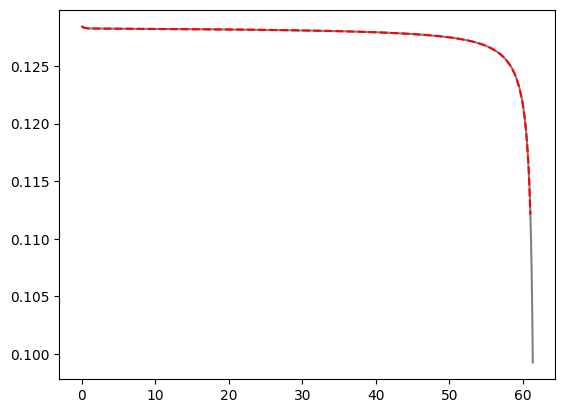

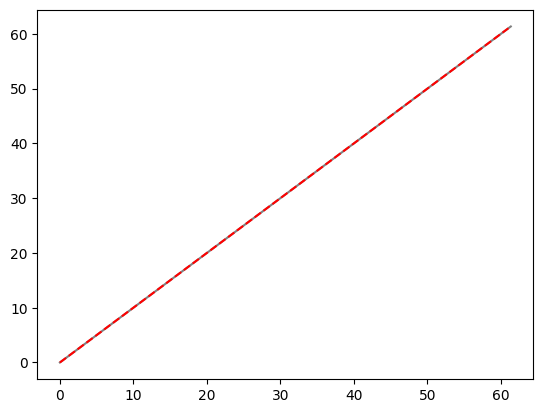

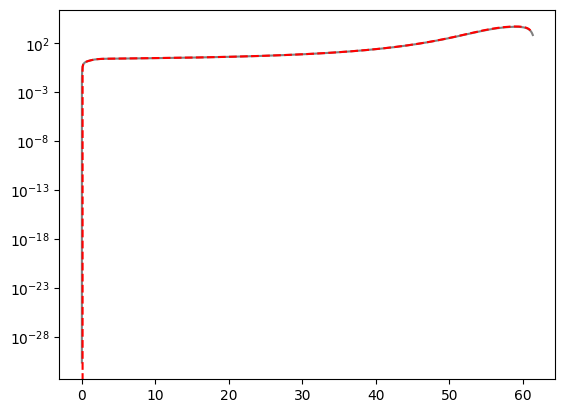

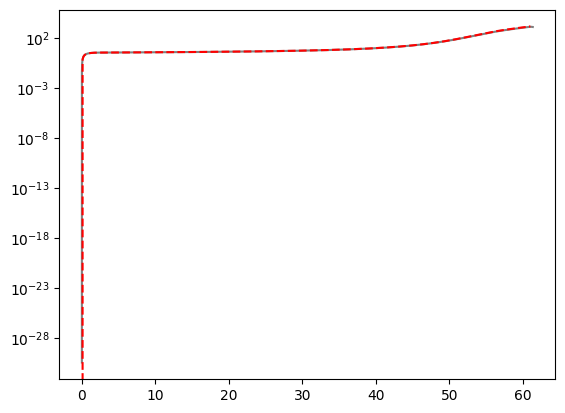

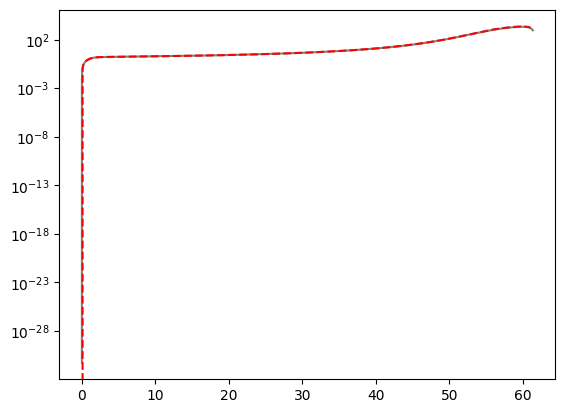

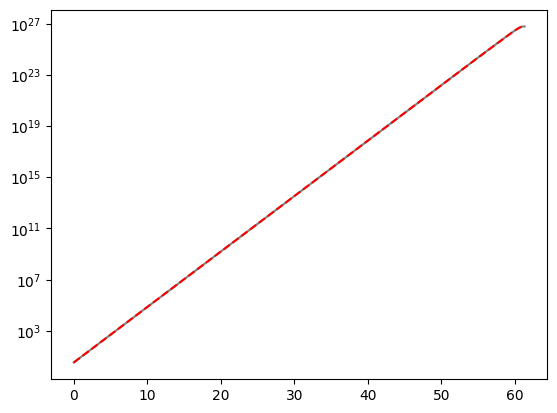

In [7]:
keys = ["phi", "xi", "H", "dphi", "N"]
Nend1 = GEFComp.EndOfInflation()
print(Nend1)
Nend2 = GEF1.Nend
print(Nend2)
for key in keys:
    plt.plot(GEFComp.vals["N"], abs(GEFComp.vals[key]), "gray")
    plt.plot(GEF1.vals["N"], abs(GEF1.vals[key]), "r--")
    #plt.vlines(Nend1, min(abs(GEFComp.vals[key])), max(abs(GEFComp.vals[key])), color="orange")
    #plt.vlines(Nend2, min(abs(GEFComp.vals[key])), max(abs(GEFComp.vals[key])), color="red", linestyle="dashed")
    plt.show()
keys = ["E", "B", "G", "kh"]
for key in keys:
    plt.plot(GEFComp.vals["N"], abs(GEFComp.vals[key]), "gray")
    plt.plot(GEF1.vals["N"], abs(GEF1.vals[key]), "r--")
    #plt.vlines(Nend1, min(abs(GEFComp.vals[key])), max(abs(GEFComp.vals[key])), color="orange")
    #plt.vlines(Nend2, min(abs(GEFComp.vals[key])), max(abs(GEFComp.vals[key])), color="red", linestyle="dashed")
    plt.yscale("log")
    plt.show()
        


In [5]:
G.Unitful()

epsH = -G.vals["Hprime"]/G.vals["H"]**2

fig, ax = plt.subplots(3,1, sharex=True, figsize=(8,10))
ax[0].plot(G.vals["N"], G.vals["H"], "k")
ax[0].set_ylim(0.725e-5,1.61e-5)
yticks = np.round(np.arange(0.8, 1.61, 0.2),1)
ytickslab = [rf"${ytick}$" + r"$\times 10^{-5}$" for ytick in yticks]
ax[0].set_yticks(yticks*1e-5, ytickslab)
yticksmin = np.arange(0.75, 1.65, 0.05)
ax[0].set_yticks(yticksmin*1e-5, minor=True)
ax[0].set_ylabel(r"$H/M_{\rm P}$")

ax[1].plot(G.vals["N"], epsH, "k")
yticks = [5e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1]
ytickslab = [r"$5 \times 10^{-4}$", r"$0.001$", r"$0.005$", r"$0.010$", r"$0.050$", r"$0.100$"]

ax[1].set_ylim(4e-4,0.2)
ax[1].set_yscale("log")
ax[1].set_yticks(yticks, ytickslab)
ax[1].set_ylabel(r"$\varepsilon_H$")

ax[2].plot(G.vals["N"], G.vals["xi"], "k")
ax[2].set_ylim(4e-4,0.2)
ax[2].set_yscale("log")

ax[2].set_xticks(np.arange(0, 70, 10))
ax[2].set_xticks(np.arange(0, 70, 2), minor=True)
ax[2].set_xlim(-1, 61)
plt.subplots_adjust(hspace=0)
plt.show()

NameError: name 'G' is not defined